In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# 1 - Data

In [2]:
states_nav = np.load('../results/nav_states.npy')
states_fluid = np.load('../results/fluid_states.npy')

In [3]:
vel_primal_exact = np.load('../results/vel_primal_exact.npy')
vel_dual_exact = np.load('../results/vel_dual_exact.npy')
vel_primal_approx = np.load('../results/vel_primal_approx.npy')
vel_dual_approx = np.load('../results/vel_dual_approx.npy')

vel_primal_exact_eta = np.load('../results/vel_primal_exact_eta.npy')
vel_dual_exact_eta = np.load('../results/vel_dual_exact_eta.npy')
vel_primal_approx_eta = np.load('../results/vel_primal_approx_eta.npy')
vel_dual_approx_eta = np.load('../results/vel_dual_approx_eta.npy')

vel_primal_exact_tau = np.load('../results/vel_primal_exact_tau.npy')
vel_dual_exact_tau = np.load('../results/vel_dual_exact_tau.npy')
vel_primal_approx_tau = np.load('../results/vel_primal_approx_tau.npy')
vel_dual_approx_tau = np.load('../results/vel_dual_approx_tau.npy')

dg_eta_exact = np.load('../results/vel_primal_exact_dg.npy')
dg_eta_inexact = np.load('../results/vel_primal_inexact_dg.npy')

In [4]:
vel_sampled_primal = np.load('../results/vel_sampled_primal.npy')
vel_sampled_dual = np.load('../results/vel_sampled_dual.npy')
vel_sampled_primal_dm = np.load('../results/vel_sampled_primal_dm.npy')
vel_sampled_dual_dm = np.load('../results/vel_sampled_dual_dm.npy')

obs_sampled_primal = np.load('../results/obs_primal.npy')
obs_sampled_dual = np.load('../results/obs_dual.npy')
obs_sampled_primal_dm = np.load('../results/obs_primal_dm.npy')
obs_sampled_dual_dm = np.load('../results/obs_dual_dm.npy')

In [5]:
burg_sampled_primal = np.load('../results/burg_primal.npy')
burg_sampled_dual = np.load('../results/burg_dual.npy')

burg_sampled_primal_dm = np.load('../results/burg_primal_dm.npy')
burg_sampled_dual_dm = np.load('../results/burg_dual_dm.npy')

# 2 - Plot main paper

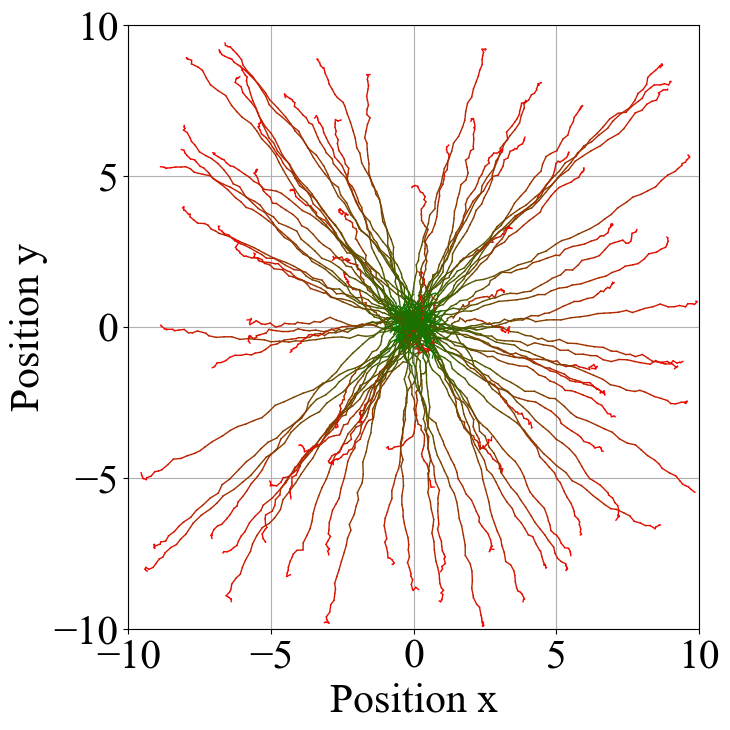

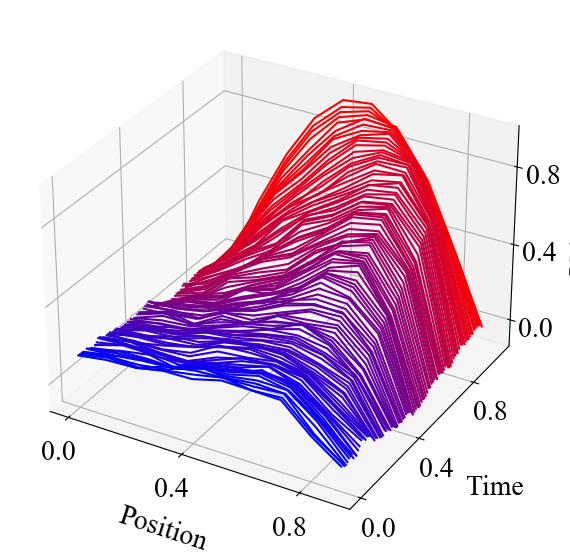

In [6]:
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.serif': 'Times New Roman'})

fig1 = plt.figure(figsize=(8, 8))

for states in states_nav:
    cmap = LinearSegmentedColormap.from_list('trajectory_cmap', ['red', 'green'], N=states.shape[0])
    for i in range(states.shape[0] - 1):
        plt.plot(states[i:i+2, 0], states[i:i+2, 1], color=cmap(i), linewidth=1)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid('off')
plt.scatter(0, 0, marker='*', c='green')
plt.xlabel('Position x')
plt.ylabel('Position y')

plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-10, -5, 0, 5, 10])

plt.tight_layout()
plt.savefig('../figures/fig_1a.png')

plt.rcParams.update({'font.size': 20})
fig2 = plt.figure(figsize=(7, 8))
ax2 = fig2.add_subplot(111, projection='3d')

normalized_time = np.linspace(1, 0, states_fluid.shape[0])
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['red', 'blue'], N=states_fluid.shape[0])

for i in range(states_fluid.shape[0]):
    color = cmap(i)
    ax2.plot(
        np.arange(0, 1, 0.1),
        [normalized_time[i]] * states_fluid.shape[1],
        states_fluid[i, :],
        color=color,
        linestyle='solid',
    )

ax2.set_xlabel('Position', labelpad=15)
ax2.set_ylabel('Time', labelpad=20)
ax2.set_zlabel('Velocity', labelpad=10)

ax2.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=3))
ax2.zaxis.set_major_locator(MaxNLocator(nbins=3))

plt.tight_layout(pad=3)
plt.savefig('../figures/fig_1b.png')

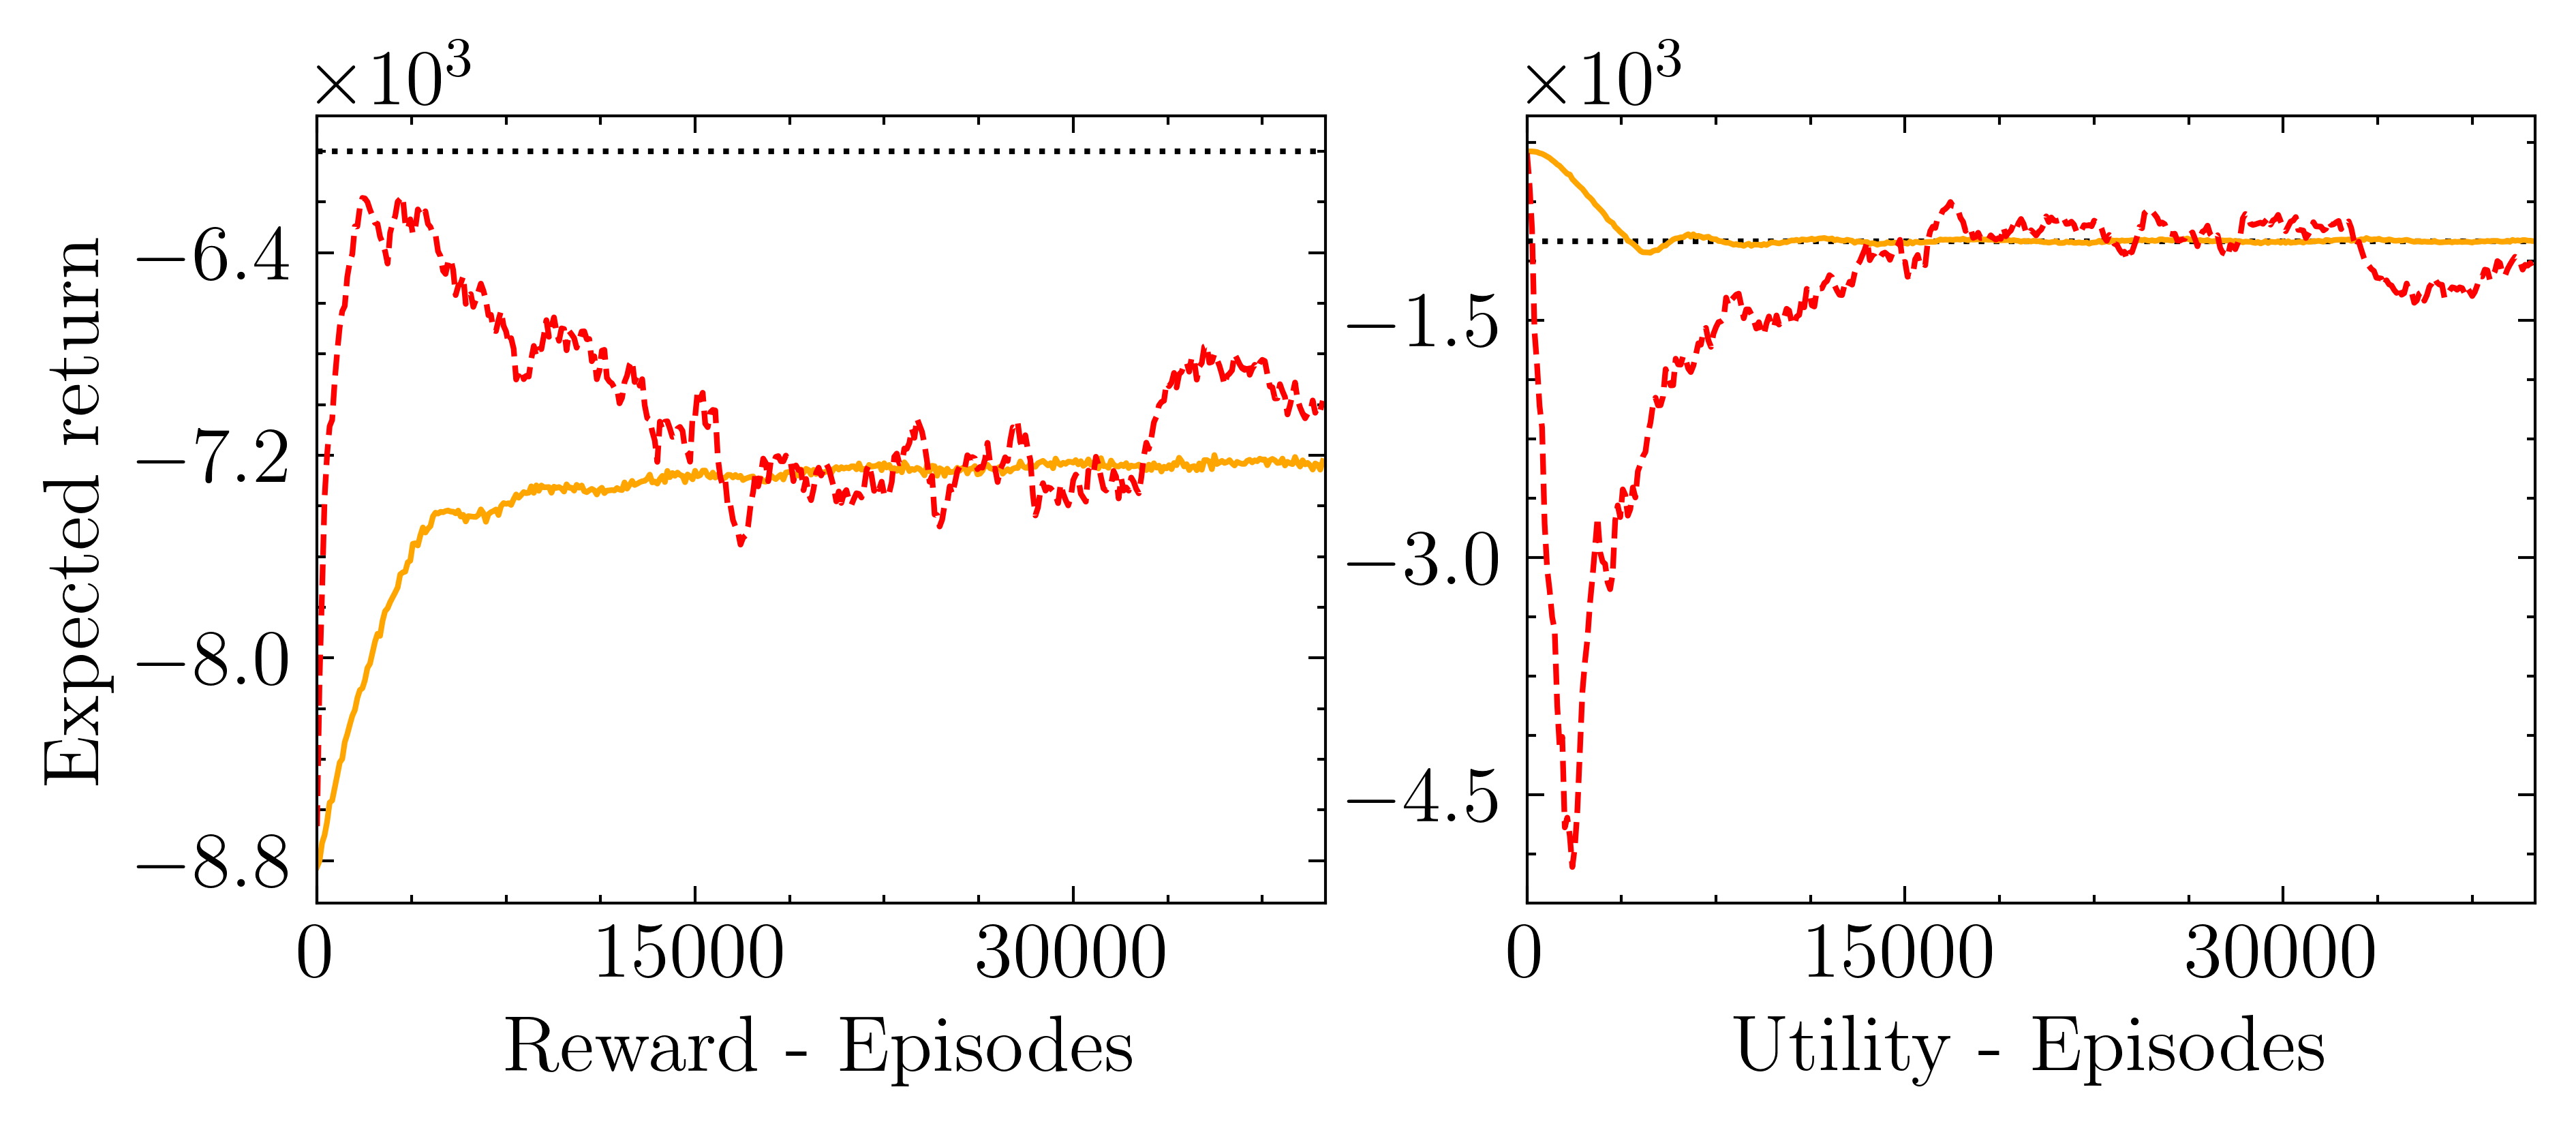

In [7]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[7, 2.5])

    axes[0].axhline(y=-6_000, color='k', linestyle=':', label='Unconstrained')
    axes[0].plot(np.arange(0, 40_000, 100), vel_sampled_primal[::10], label='ADPGPD-sampled', color='orange')
    axes[0].plot(np.arange(0, 40_000, 100), vel_sampled_primal_dm, label='PGDual')
    axes[0].set_xlim(0, 40_000)
    axes[0].set_ylabel('Expected return')
    axes[0].set_xlabel('Reward - Episodes')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-1_000, color='k', linestyle=':', label='Constraint')
    axes[1].plot(np.arange(0, 40_000, 100), vel_sampled_dual[::100], label='ADPGPD-sampled', color='orange')
    axes[1].plot(np.arange(0, 40_000, 100), vel_sampled_dual_dm, label='PGDual')
    axes[1].set_xlim(0, 40_000)
    axes[1].set_xlabel('Utility - Episodes')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.savefig('../figures/fig_2.png')

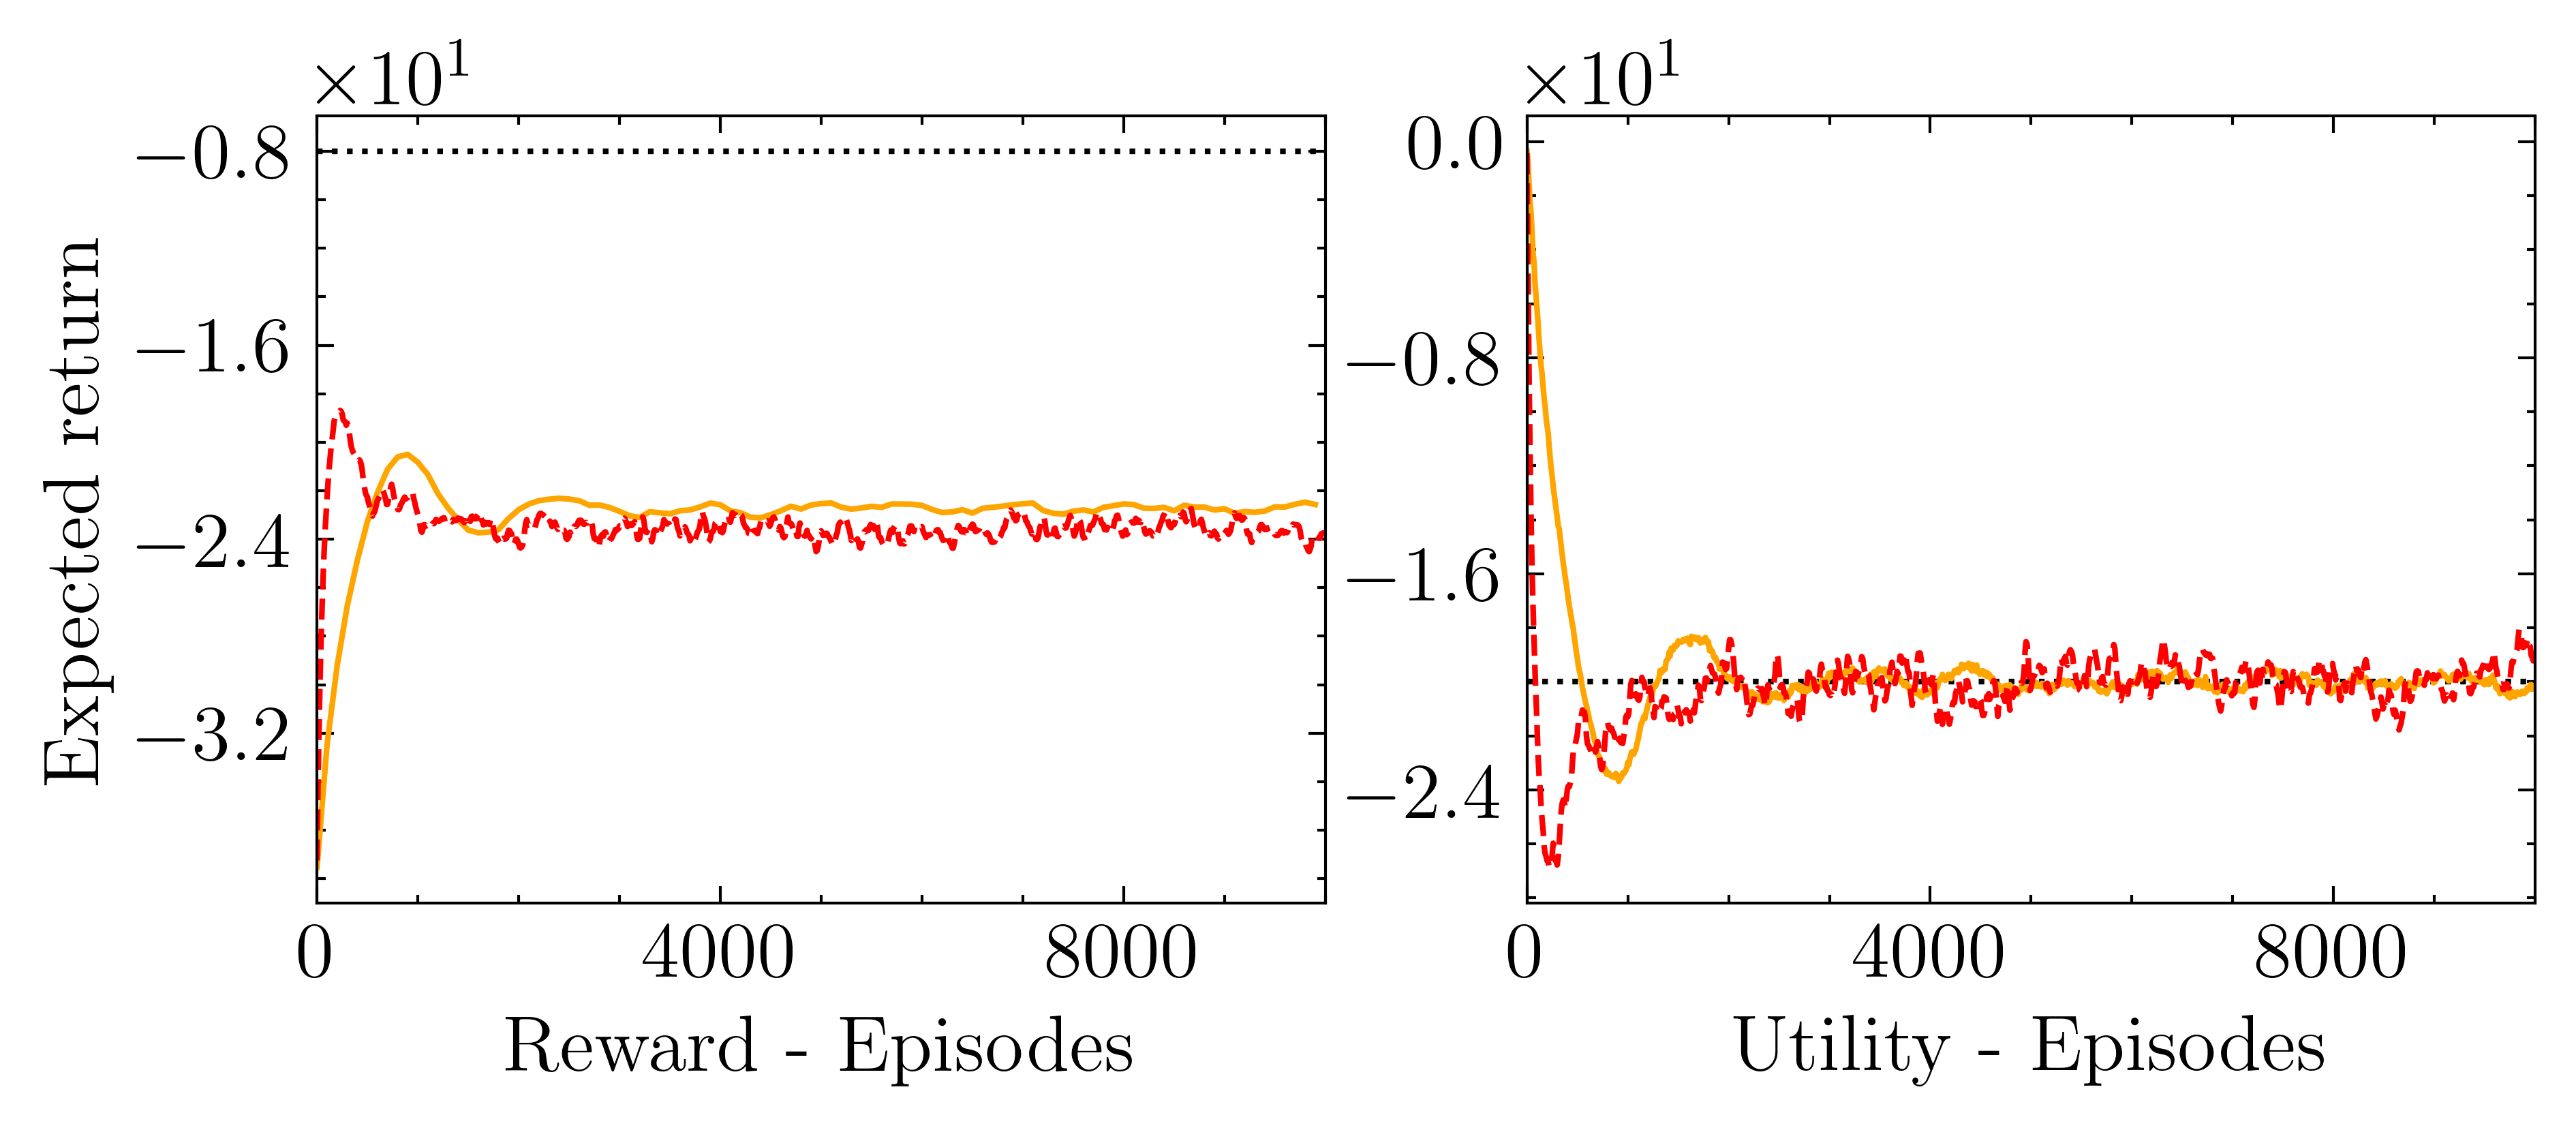

In [8]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[7, 2.5])

    axes[0].axhline(y=-8, color='k', linestyle=':', label='Unconstrained')
    axes[0].plot(np.arange(0, 10_000, 100), burg_sampled_primal[::10], label='ADPGPD-sampled', color='orange')
    axes[0].plot(np.arange(0, 10_000, 10), burg_sampled_primal_dm, label='PGDual')
    axes[0].set_xlim(0, 10_000)
    axes[0].set_xlabel('Reward - Episodes')
    axes[0].set_ylabel('Expected return')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-20, color='k', linestyle=':', label='Constraint')
    axes[1].plot(np.arange(0, 10_000, 10), burg_sampled_dual[::10], label='ADPGPD-sampled', color='orange')
    axes[1].plot(np.arange(0, 10_000, 10), burg_sampled_dual_dm, label='PGDual')
    axes[1].set_xlim(0, 10_000)
    axes[1].set_xlabel('Utility - Episodes')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.savefig('../figures/fig_3.png')

# 3 - Plots navigation

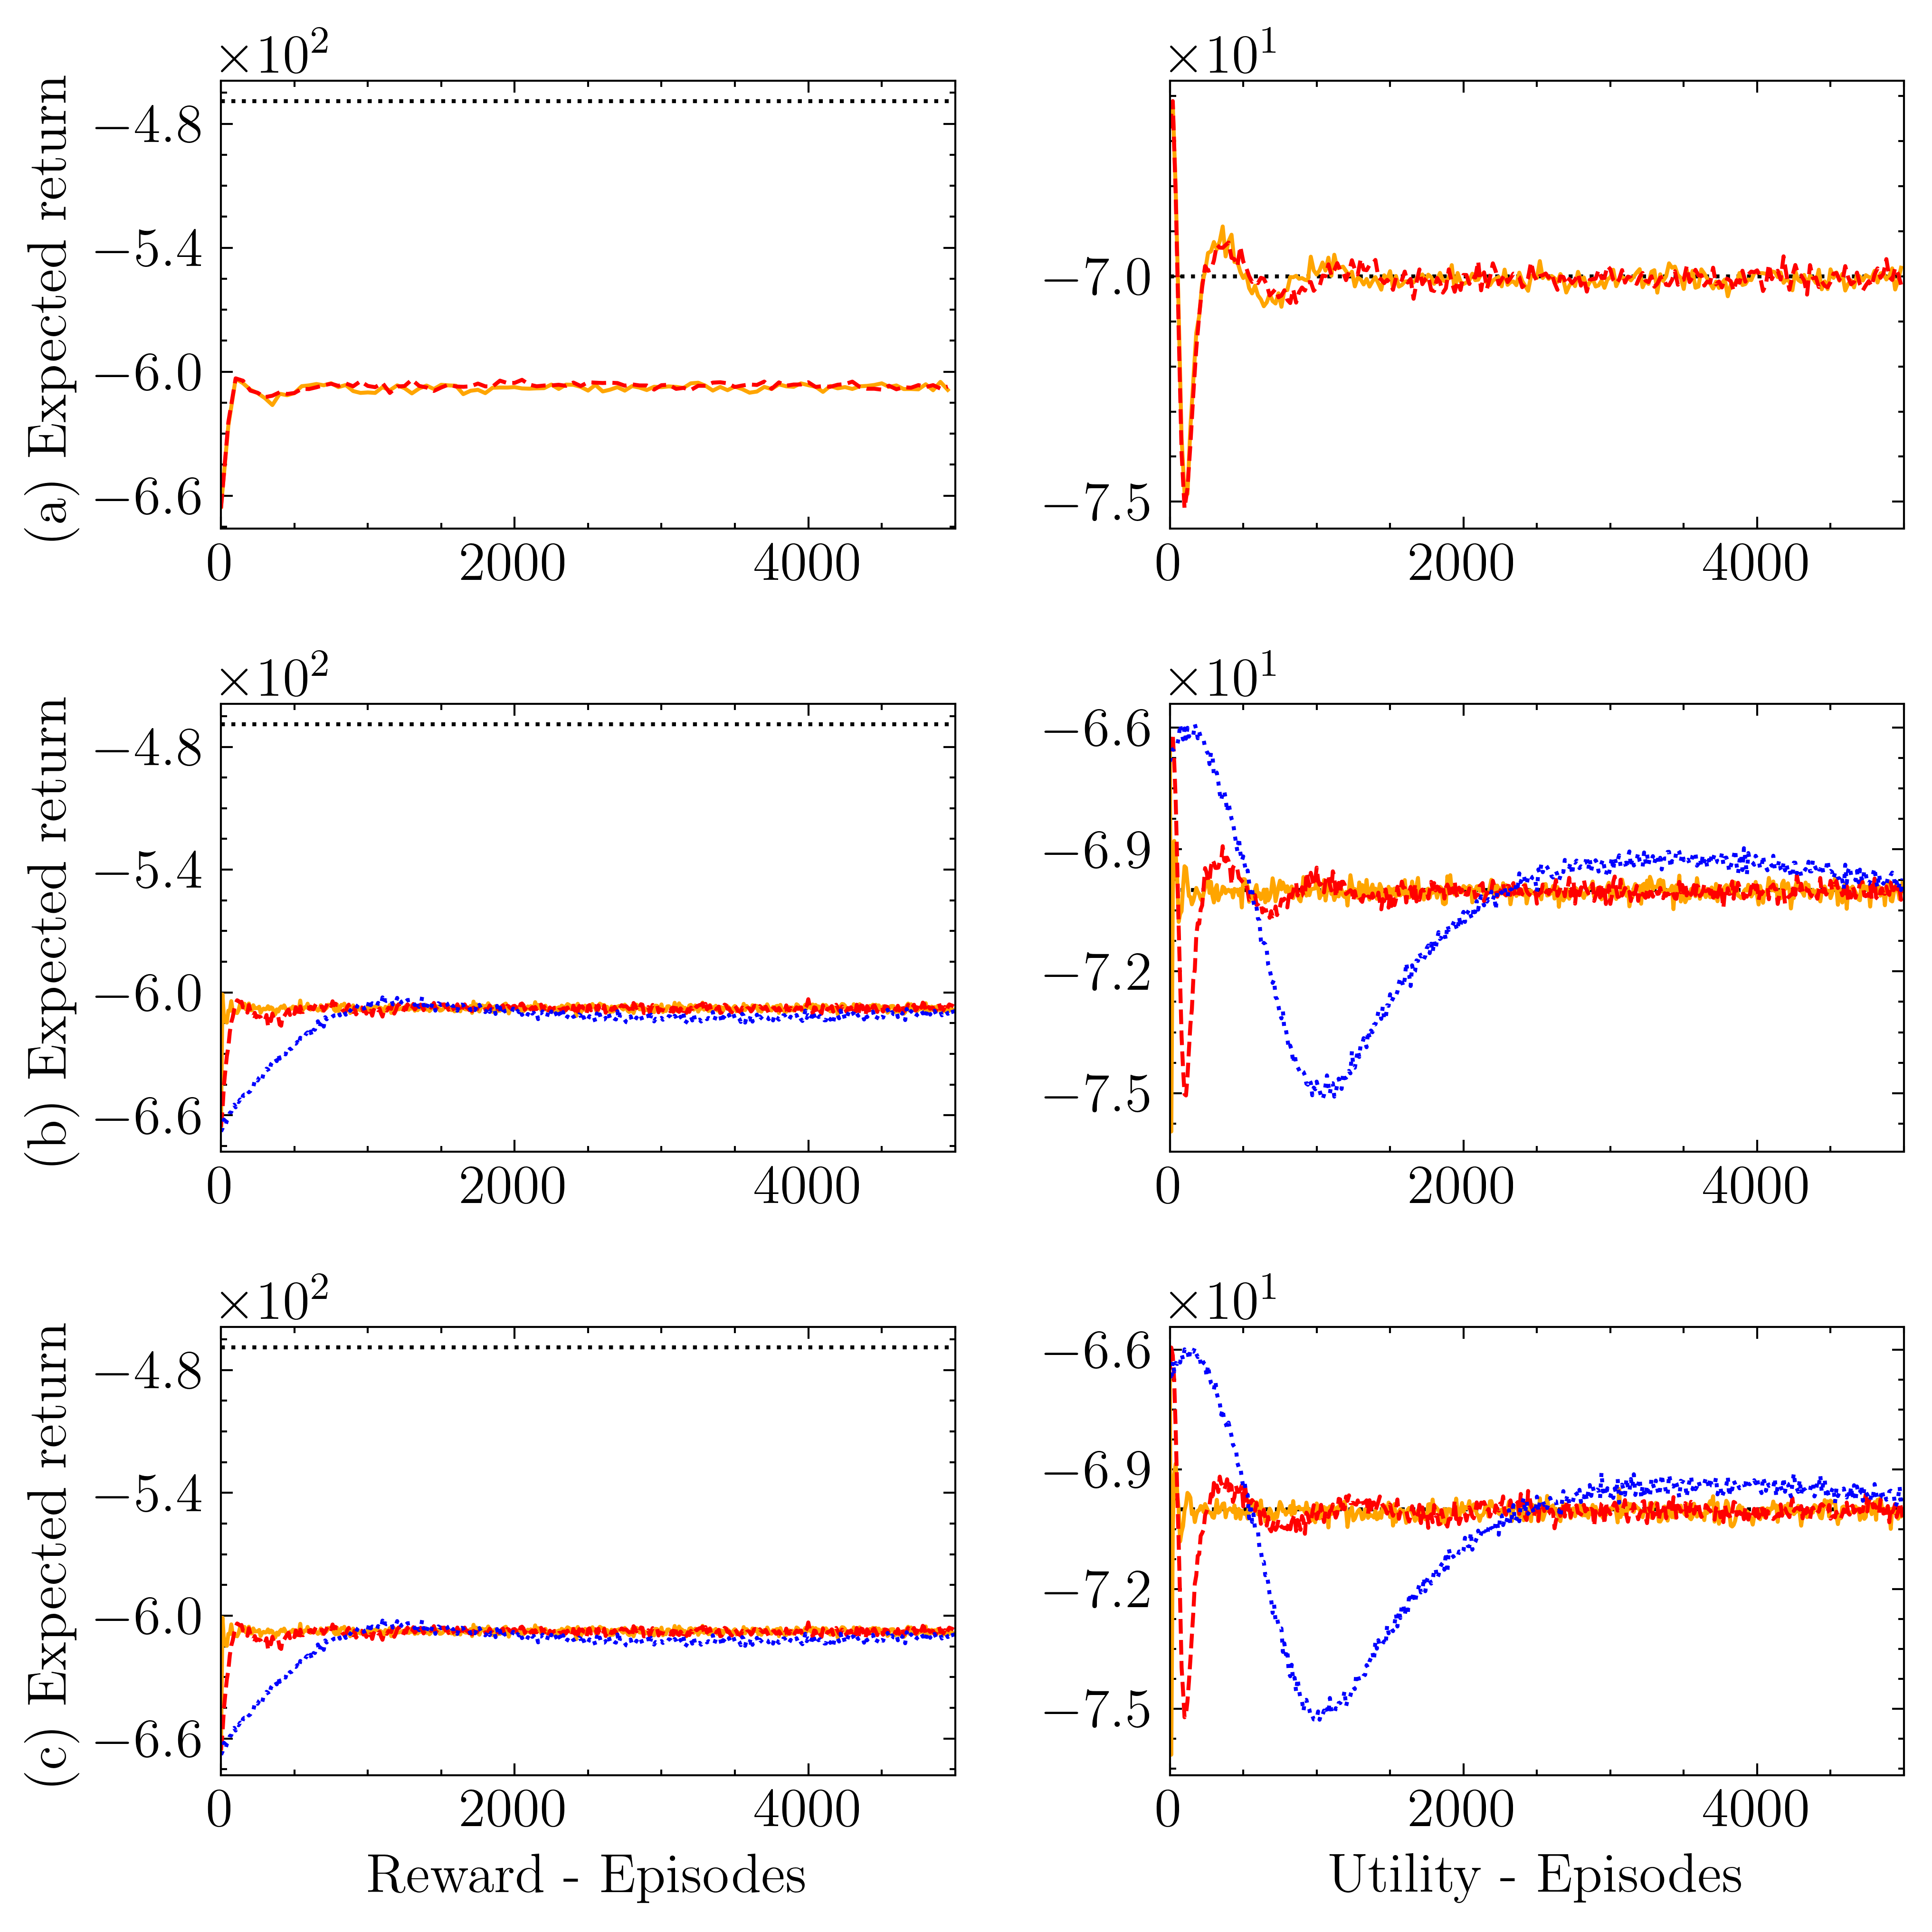

In [12]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[7, 7])

    axes[0, 0].axhline(y=p, color='k', linestyle=':', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 2000, 50), vel_primal_exact[::5], label='D-PGPD-exact', color='orange')
    axes[0, 0].plot(np.arange(0, 2000, 50), vel_primal_approx[::5], label='AD-PGPD-exact')
    axes[0, 0].set_xlim(0, 2000)
    axes[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 0].set_ylabel('(a) Expected return')

    axes[0, 1].axhline(y=b, color='k', linestyle=':', label='Constraint')
    axes[0, 1].plot(np.arange(0, 2000, 20), vel_dual_exact[::2], label='D-PGPD-exact', color='orange')
    axes[0, 1].plot(np.arange(0, 2000, 20), vel_dual_approx[::2], label='AD-PGPD-exact')
    axes[0, 1].set_xlim(0, 2000)
    axes[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1, 0].axhline(y=p, color='k', linestyle=':', label='Unconstrained')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='D-PGPD-exact $\eta=0.1$', color='orange')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='D-PGPD-exact $\eta=0.01$')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='D-PGPD-exact $\eta=0.001$')
    axes[1, 0].set_xlim(0, 2000)
    axes[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 0].set_ylabel('(b) Expected return')

    axes[1, 1].axhline(y=b, color='k', linestyle=':', label='Constraint')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[0, :], label='D-PGPD-exact $\eta=0.1$', color='orange')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[1, :], label='D-PGPD-exact $\eta=0.01$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[2, :], label='D-PGPD-exact $\eta=0.001$')
    axes[1, 1].set_xlim(0, 2000)
    axes[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[2, 0].axhline(y=p, color='k', linestyle=':', label='Unconstrained')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='AD-PGPD-exact $\eta=0.1$', color='orange')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='AD-PGPD-exact $\eta=0.01$')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='AD-PGPD-exact $\eta=0.001$')
    axes[2, 0].set_xlim(0, 2000)
    axes[2, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[2, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[2, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[2, 0].set_xlabel('Reward - Episodes')
    axes[2, 0].set_ylabel('(c) Expected return')

    axes[2, 1].axhline(y=b, color='k', linestyle=':', label='Constraint')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[0, :], label='AD-PGPD-exact $\eta=0.1$', color='orange')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[1, :], label='AD-PGPD-exact $\eta=0.01$')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[2, :], label='AD-PGPD-exact $\eta=0.001$')
    axes[2, 1].set_xlim(0, 2000)
    axes[2, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[2, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[2, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[2, 1].set_xlabel('Utility - Episodes')

    plt.tight_layout()
    plt.savefig('../figures/fig_4.png')

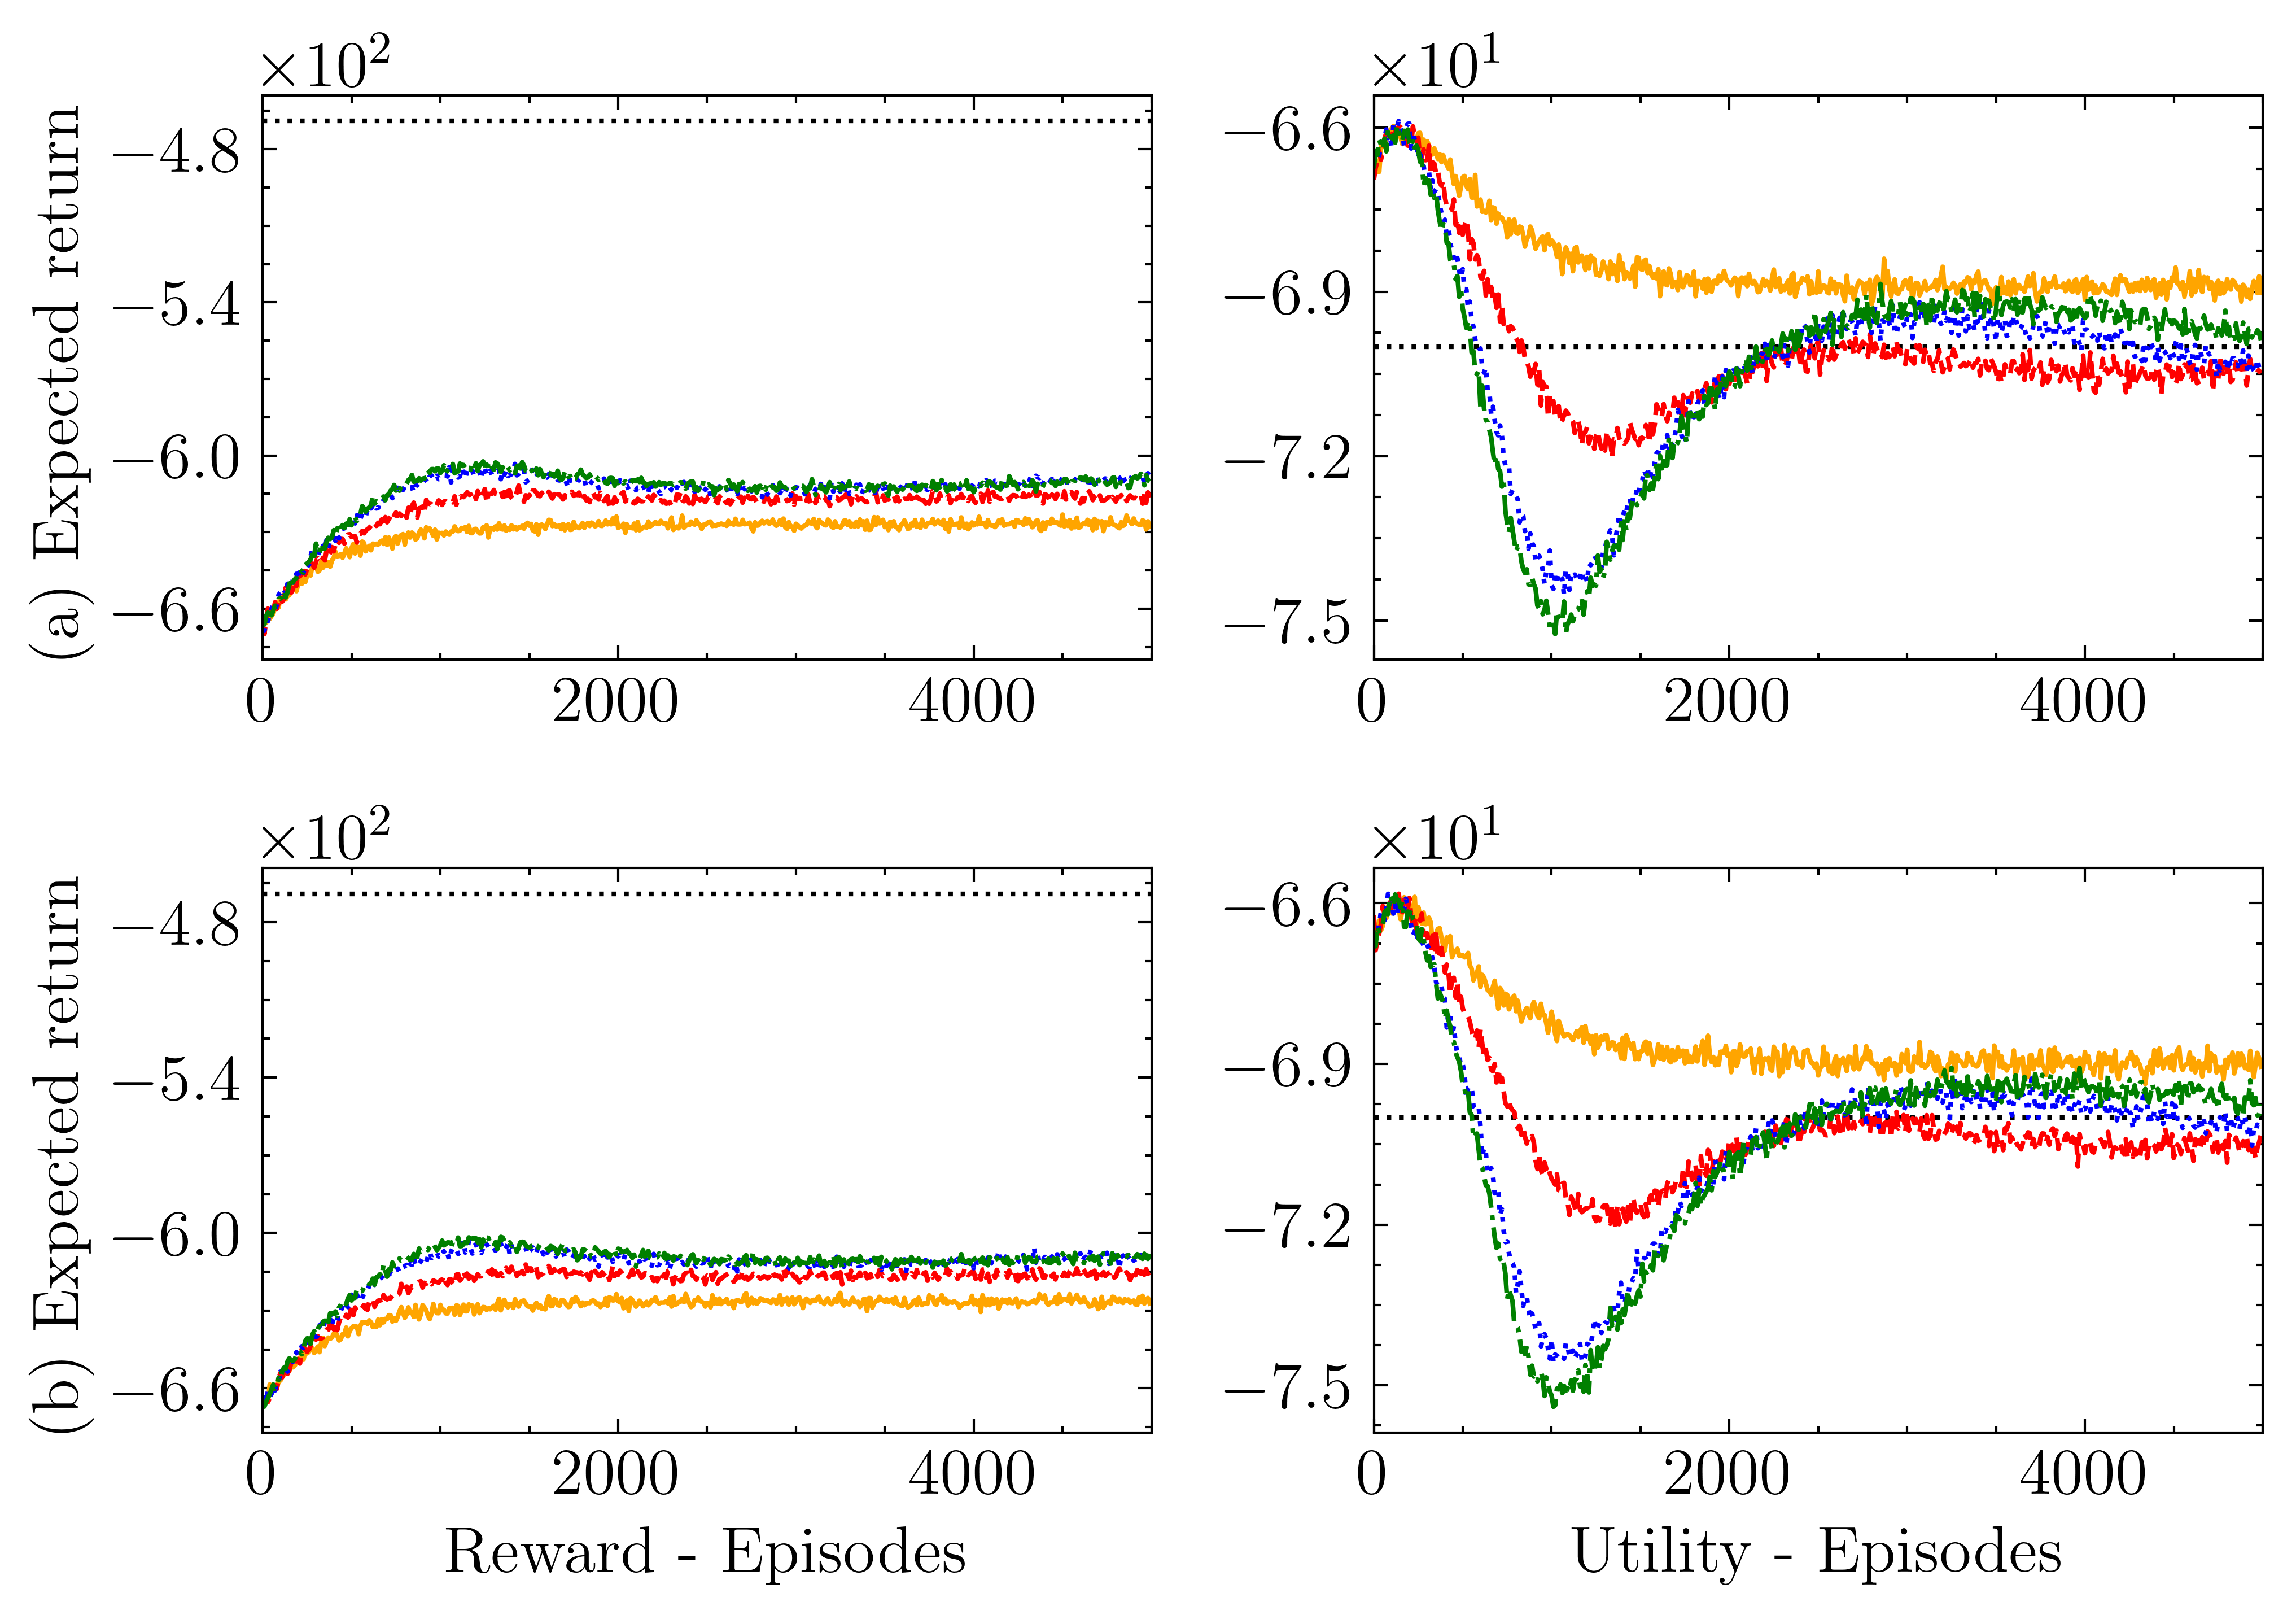

In [17]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[7, 5])

    axes[0, 0].axhline(y=p, color='k', linestyle=':', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_tau[0, :], label='D-PGPD-exact $\\tau=1.0$', color='orange')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_tau[1, :], label='D-PGPD-exact $\\tau=0.1$')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_tau[2, :], label='D-PGPD-exact $\\tau=0.01$')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_tau[3, :], label='D-PGPD-exact $\\tau=0.001$')
    axes[0, 0].set_xlim(0, 2000)
    axes[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 0].set_ylabel('(a) Expected return')

    axes[0, 1].axhline(y=b, color='k', linestyle=':', label='Constraint')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_tau[0, :], label='D-PGPD-exact $\\tau=1.0$', color='orange')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_tau[1, :], label='D-PGPD-exact $\\tau=0.1$')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_tau[2, :], label='D-PGPD-exact $\\tau=0.01$')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_tau[3, :], label='D-PGPD-exact $\\tau=0.001$')
    axes[0, 1].set_xlim(0, 2000)
    axes[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1, 0].axhline(y=p, color='k', linestyle=':', label='Unconstrained')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_approx_tau[0, :], label='AD-PGPD-exact $\\tau=1.0$', color='orange')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_approx_tau[1, :], label='AD-PGPD-exact $\\tau=0.1$')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_approx_tau[2, :], label='AD-PGPD-exact $\\tau=0.01$')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_approx_tau[3, :], label='AD-PGPD-exact $\\tau=0.001$')
    axes[1, 0].set_xlim(0, 2000)
    axes[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 0].set_xlabel('Reward - Episodes')
    axes[1, 0].set_ylabel('(b) Expected return')

    axes[1, 1].axhline(y=b, color='k', linestyle=':', label='Constraint')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_tau[0, :], label='AD-PGPD-exact $\\tau=1.0$', color='orange')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_tau[1, :], label='AD-PGPD-exact $\\tau=0.1$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_tau[2, :], label='AD-PGPD-exact $\\tau=0.01$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_tau[3, :], label='AD-PGPD-exact $\\tau=0.001$')
    axes[1, 1].set_xlim(0, 2000)
    axes[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[1, 1].set_xlabel('Utility - Episodes')

    plt.tight_layout()
    plt.savefig('../figures/fig_5.png')


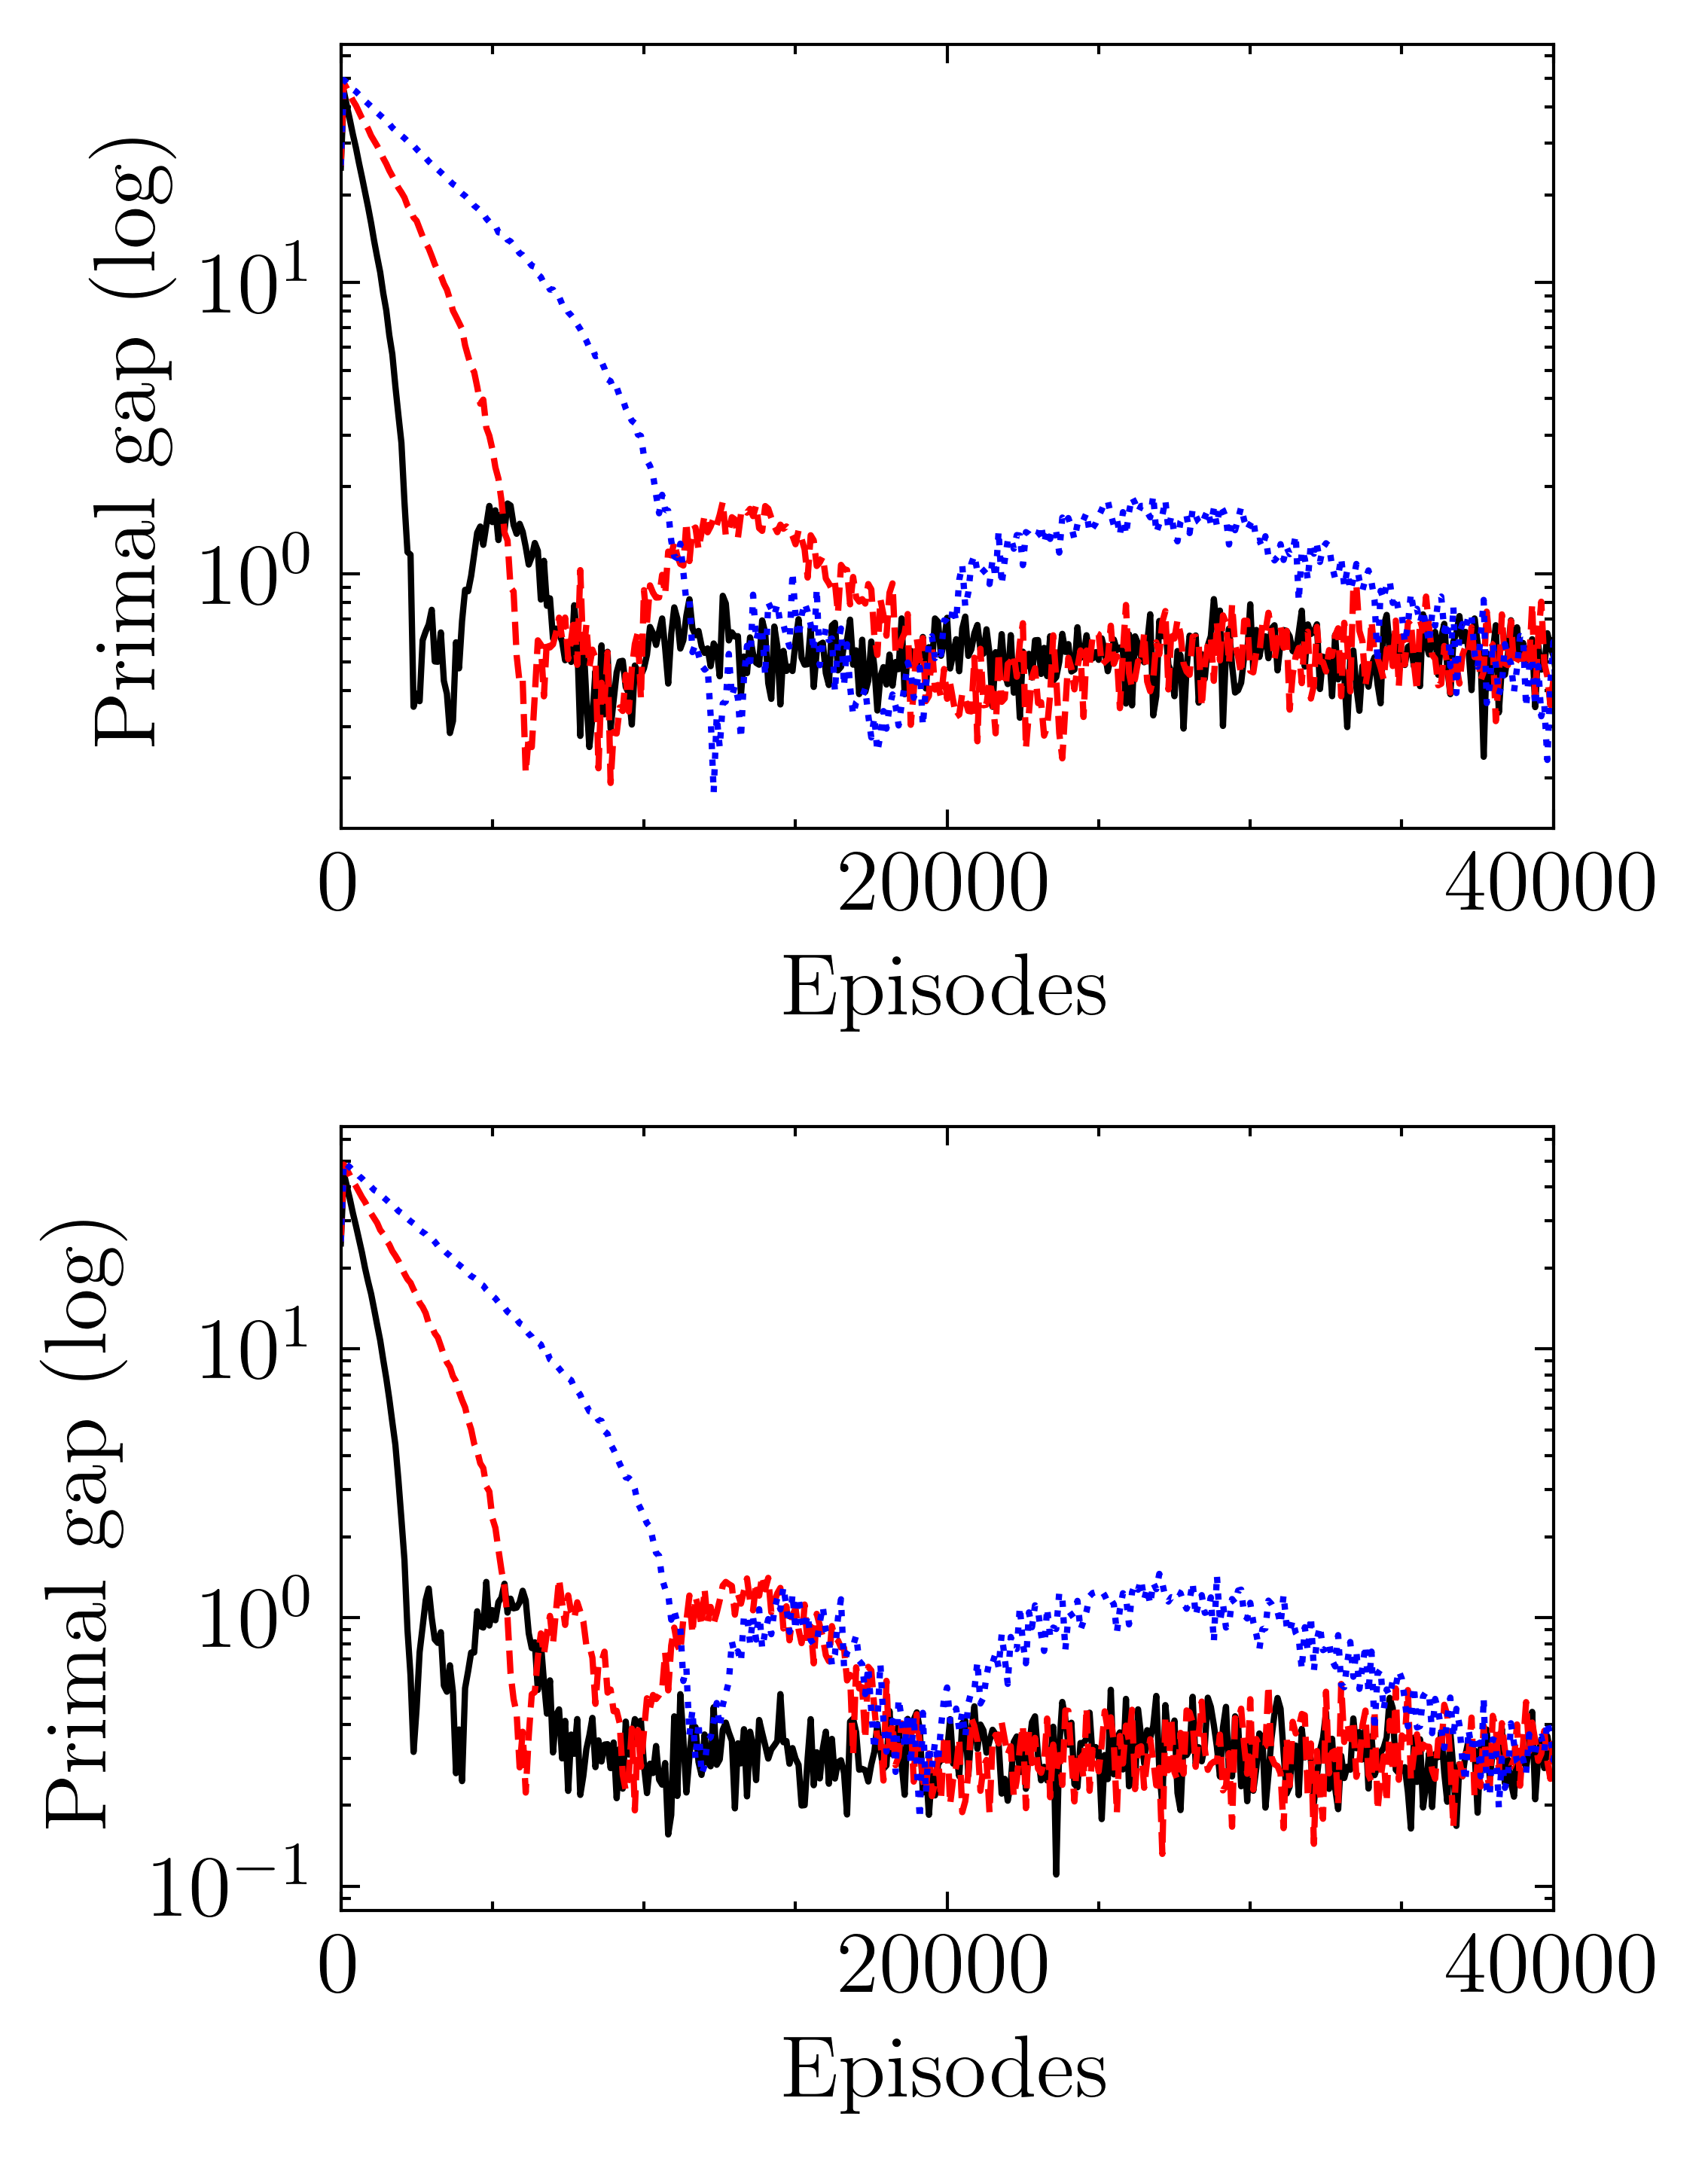

In [18]:
window_size = 10

rolling_mean_inexact = np.array([np.convolve(series, np.ones(window_size)/window_size, mode='same') for series in dg_eta_inexact])
rolling_mean_exact = np.array([np.convolve(series, np.ones(window_size)/window_size, mode='same') for series in dg_eta_exact])

with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(2, 1, figsize=(4, 5))

    for i in range(rolling_mean_exact.shape[0]):
        axes[0].plot(
            np.arange(0, rolling_mean_exact.shape[1] * 10, 100),
            rolling_mean_exact[i][::10],
        )
    axes[0].set_xlim(0, 40_000)
    axes[0].set_yscale('log')
    axes[0].set_xlabel('Episodes')
    axes[0].set_ylabel('Primal gap (log)')

    for i in range(rolling_mean_inexact.shape[0]):
        axes[1].plot(
            np.arange(0, rolling_mean_inexact.shape[1] * 10, 100),
            rolling_mean_inexact[i][::10],
        )
    axes[1].set_xlim(0, 40_000)
    axes[1].set_yscale('log')
    axes[1].set_xlabel('Episodes')
    axes[1].set_ylabel('Primal gap (log)')

    plt.tight_layout()
    plt.savefig('../figures/fig_6.png')

In [327]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[4, 5])

    axes[0].axhline(y=-6_000, color='k', linestyle=':', label='Unconstrained')
    axes[0].plot(np.arange(0, 40000, 100), vel_sampled_primal[::10], label='ADPGPD-sampled', color='orange')
    axes[0].plot(np.arange(0, 40000, 100), vel_sampled_primal_dm, label='PGDual')
    axes[0].set_xlim(0, 40000)
    axes[0].set_ylabel('Reward value')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-1000, color='k', linestyle=':', label='Constraint')
    axes[1].plot(np.arange(0, 40000, 100), vel_sampled_dual[::100], label='ADPGPD-sampled', color='orange')
    axes[1].plot(np.arange(0, 40000, 100), vel_sampled_dual_dm, label='PGDual')
    axes[1].set_xlim(0, 40000)
    axes[1].set_ylabel('Utility value')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.savefig('../figures/fig_7.png')

with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[4, 5])

    axes[0].axhline(y=-50_000, color='k', linestyle=':', label='Unconstrained')
    axes[0].plot(np.arange(0, 50000, 100), obs_sampled_primal[::10], label='ADPGPD-sampled', color='orange')
    axes[0].plot(np.arange(0, 50000, 100), obs_sampled_primal_dm[::10], label='PGDual')
    axes[0].set_xlim(0, 50000)
    axes[0].set_ylabel('Reward value')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-200, color='k', linestyle=':', label='Constraint')
    axes[1].plot(np.arange(0, 50000, 10), obs_sampled_dual[::10], label='ADPGPD-sampled', color='orange')
    axes[1].plot(np.arange(0, 50000, 10), obs_sampled_dual_dm, label='PGDual')
    axes[1].set_xlim(0, 50000)
    axes[1].set_ylabel('Utility value')
    axes[1].set_xlabel('Constraints - Episodes')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.savefig('../figures/fig_8.png')

# 4 - Plot fluid

In [328]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[4, 5])

    axes[0].axhline(y=-8, color='k', linestyle=':', label='Unconstrained')
    axes[0].plot(np.arange(0, 10_000, 100), burg_sampled_primal[::10], label='ADPGPD-sampled', color='orange')
    axes[0].plot(np.arange(0, 10_000, 10), burg_sampled_primal_dm, label='PGDual')
    axes[0].set_xlim(0, 10_000)
    axes[0].set_ylabel('Reward value')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-20, color='k', linestyle=':', label='Constraint')
    axes[1].plot(np.arange(0, 10_000, 10), burg_sampled_dual[::10], label='ADPGPD-sampled', color='orange')
    axes[1].plot(np.arange(0, 10_000, 10), burg_sampled_dual_dm, label='PGDual')
    axes[1].set_xlim(0, 10_000)
    axes[1].set_ylabel('Utility value')
    axes[1].set_xlabel('Episodes')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.savefig('../figures/fig_9.png')